In [2161]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

In [2162]:
df = pd.read_csv("strokedata.csv",na_values=['Unknown'])
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5105,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5106,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5107,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Drop ID

In [2163]:

df = df.drop('id',axis=1)

df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2164]:
number_of_unknown= df['smoking_status'].value_counts()
number_of_unknown





smoking_status
never smoked       1892
formerly smoked     884
smokes              789
Name: count, dtype: int64

One hot encoder for gender

In [2165]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Create 'ismale' and 'isfemale' columns based on 'gender'
df['is_male'] = df['gender'].apply(lambda x: 1 if x == 1 else 0)
df['is_female'] = df['gender'].apply(lambda x: 1 if x == 0 else 0)

# Drop the original 'gender' column if needed
df.drop('gender', axis=1, inplace=True)
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,0
1,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0,1
2,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,0
3,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1
4,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,1


Inplace for ever_married

In [2166]:
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1,1,0
1,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1,0,1
2,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1,1,0
3,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1,0,1
4,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1,0,1


Inplace for residence_type

In [2167]:
df['Residence_type'] = df['Residence_type'].replace({'Urban': 1, 'Rural': 0})
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1,1,0
1,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1,0,1
2,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1,1,0
3,49.0,0,0,1,Private,1,171.23,34.4,smokes,1,0,1
4,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1,0,1


Inplace Work Type

In [2168]:
df['work_type'] = df['work_type'].replace({'Private': 5,'Self-employed': 4,'Govt_job': 3,'children': 2, 'Never_worked': 1})
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67.0,0,1,1,5,1,228.69,36.6,formerly smoked,1,1,0
1,61.0,0,0,1,4,0,202.21,NaN,never smoked,1,0,1
2,80.0,0,1,1,5,0,105.92,32.5,never smoked,1,1,0
3,49.0,0,0,1,5,1,171.23,34.4,smokes,1,0,1
4,79.0,1,0,1,4,0,174.12,24.0,never smoked,1,0,1


Inplace Smoking Status

In [2169]:
df['smoking_status'] = df['smoking_status'].replace({'formerly smoked': 3,'smokes': 2,'never smoked': 1})
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67.0,0,1,1,5,1,228.69,36.6,3.0,1,1,0
1,61.0,0,0,1,4,0,202.21,NaN,1.0,1,0,1
2,80.0,0,1,1,5,0,105.92,32.5,1.0,1,1,0
3,49.0,0,0,1,5,1,171.23,34.4,2.0,1,0,1
4,79.0,1,0,1,4,0,174.12,24.0,1.0,1,0,1


Forward Manner

In [2170]:
#df ['smoking_status'].fillna(1,inplace= True)

In [2171]:
df.shape
df.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67.0,0,1,1,5,1,228.69,36.6,3.0,1,1,0
1,61.0,0,0,1,4,0,202.21,NaN,1.0,1,0,1
2,80.0,0,1,1,5,0,105.92,32.5,1.0,1,1,0
3,49.0,0,0,1,5,1,171.23,34.4,2.0,1,0,1
4,79.0,1,0,1,4,0,174.12,24.0,1.0,1,0,1


In [2172]:
numbernan = df.isna().sum()
numbernan

age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
is_male                 0
is_female               0
dtype: int64

Copy the original data frame

In [2173]:
df_copy = df
df_copy

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67.0,0,1,1,5,1,228.69,36.6,3.0,1,1,0
1,61.0,0,0,1,4,0,202.21,NaN,1.0,1,0,1
2,80.0,0,1,1,5,0,105.92,32.5,1.0,1,1,0
3,49.0,0,0,1,5,1,171.23,34.4,2.0,1,0,1
4,79.0,1,0,1,4,0,174.12,24.0,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,80.0,1,0,1,5,1,83.75,NaN,1.0,0,0,1
5105,81.0,0,0,1,4,1,125.20,40.0,1.0,0,0,1
5106,35.0,0,0,1,4,0,82.99,30.6,1.0,0,0,1
5107,51.0,0,0,1,5,0,166.29,25.6,3.0,0,1,0


find the average score

In [2174]:
without_NaN = df_copy.dropna()
average_score = without_NaN['bmi'].mean()
average_score


30.2923503649635

In [2175]:
missing_score_rows = df[df['bmi'].isna()]
print("Rows with missing 'bmi':")
print(missing_score_rows)
print(f"\n\nAverage Score is: {average_score} ")
print("\nDataFrame after filling missing 'bmi' values:")
print(df)


Rows with missing 'bmi':
       age  hypertension  heart_disease  ever_married  work_type  \
1     61.0             0              0             1          4   
8     59.0             0              0             1          5   
13    78.0             0              1             1          5   
19    57.0             0              1             0          3   
27    58.0             0              0             1          5   
...    ...           ...            ...           ...        ...   
5038  41.0             0              0             0          5   
5047  40.0             0              0             1          5   
5092  45.0             1              0             1          3   
5098  40.0             0              0             1          5   
5104  80.0             1              0             1          5   

      Residence_type  avg_glucose_level  bmi  smoking_status  stroke  is_male  \
1                  0             202.21  NaN             1.0       1        0

In [2176]:
 df_copy['bmi'].fillna(average_score,inplace= True)
 df_copy.describe()


,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,3565.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,0.656293,4.161871,0.508123,106.140399,28.949552,1.717251,0.048738,0.413975,0.586025
std,22.613575,0.296633,0.226084,0.474991,1.118746,0.499983,45.285004,7.703031,0.836021,0.215340,0.492592,0.492592
min,0.080000,0.000000,0.000000,0.000000,1.000000,0.000000,55.120000,10.300000,1.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,3.000000,0.000000,77.240000,23.800000,1.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,1.000000,5.000000,1.000000,91.880000,28.400000,1.000000,0.000000,0.000000,1.000000
75%,61.000000,0.000000,0.000000,1.000000,5.000000,1.000000,114.090000,32.800000,2.000000,0.000000,1.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,5.000000,1.000000,271.740000,97.600000,3.000000,1.000000,1.000000,1.000000


Forward Manner for smoking status ( We use forward manner beacause of the last smoking status is NaN, and Ml not accept the nan)

In [2177]:
df_copy.ffill(axis=0,inplace=True)
df_copy

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_male,is_female
0,67.0,0,1,1,5,1,228.69,36.60000,3.0,1,1,0
1,61.0,0,0,1,4,0,202.21,30.29235,1.0,1,0,1
2,80.0,0,1,1,5,0,105.92,32.50000,1.0,1,1,0
3,49.0,0,0,1,5,1,171.23,34.40000,2.0,1,0,1
4,79.0,1,0,1,4,0,174.12,24.00000,1.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,80.0,1,0,1,5,1,83.75,30.29235,1.0,0,0,1
5105,81.0,0,0,1,4,1,125.20,40.00000,1.0,0,0,1
5106,35.0,0,0,1,4,0,82.99,30.60000,1.0,0,0,1
5107,51.0,0,0,1,5,0,166.29,25.60000,3.0,0,1,0


Solving Imbalanced Problem

<Axes: title={'center': 'count (target)'}, xlabel='stroke'>

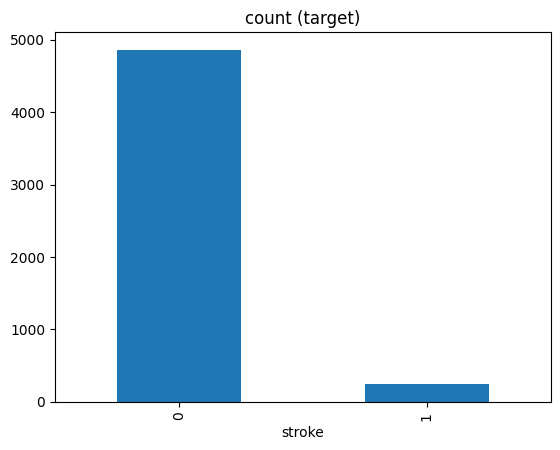

In [2178]:
df['stroke'].value_counts().plot(kind='bar', title='count (target)')

       age  hypertension  heart_disease  ever_married  work_type  \
0     67.0             0              1             1          5   
1     61.0             0              0             1          4   
2     80.0             0              1             1          5   
3     49.0             0              0             1          5   
4     79.0             1              0             1          4   
...    ...           ...            ...           ...        ...   
5104  80.0             1              0             1          5   
5105  81.0             0              0             1          4   
5106  35.0             0              0             1          4   
5107  51.0             0              0             1          5   
5108  44.0             0              0             1          3   

      Residence_type  avg_glucose_level       bmi  smoking_status  is_male  \
0                  1             228.69  36.60000             3.0        1   
1                  0       

<Axes: title={'center': 'count (target)'}, xlabel='stroke'>

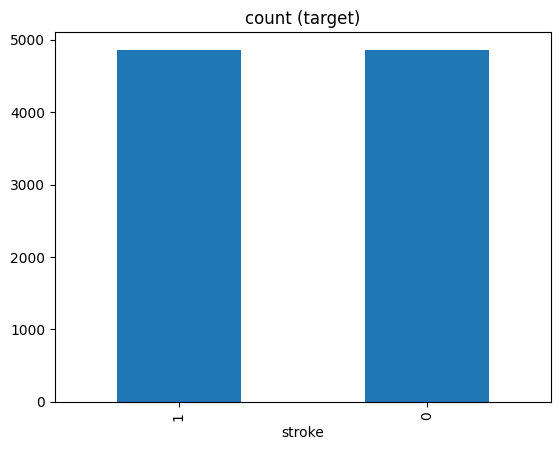

In [2179]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
 
ros = RandomOverSampler(random_state=42)
y = df_copy['stroke']
x = df_copy.drop(columns=['stroke'])


# fit predictor and target variable 
x_ros, y_ros = ros.fit_resample(x, y)

y_ros_df = pd.DataFrame(y_ros, columns=['stroke'])
x_ros_df = pd.DataFrame(x_ros, columns=x.columns)


print(x)
frames = [x_ros_df,y_ros_df];
df_copy = pd.concat(frames, axis=1)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_ros))

df_copy['stroke'].value_counts().plot(kind='bar', title='count (target)')


In [2180]:
df_copy.describe()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,is_male,is_female,stroke
count,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000,9720.000000
mean,54.921819,0.174177,0.122016,0.762654,4.292284,0.528395,118.387724,29.585221,1.813580,0.421708,0.578292,0.500000
std,22.232920,0.379281,0.327322,0.425478,0.972966,0.499219,55.205804,6.832753,0.868218,0.493858,0.493858,0.500026
min,0.080000,0.000000,0.000000,0.000000,1.000000,0.000000,55.120000,10.300000,1.000000,0.000000,0.000000,0.000000
25%,41.000000,0.000000,0.000000,1.000000,4.000000,0.000000,78.050000,25.300000,1.000000,0.000000,0.000000,0.000000
50%,59.000000,0.000000,0.000000,1.000000,5.000000,1.000000,96.770000,29.600000,2.000000,0.000000,1.000000,0.500000
75%,74.000000,0.000000,0.000000,1.000000,5.000000,1.000000,144.900000,32.500000,3.000000,1.000000,1.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,5.000000,1.000000,271.740000,97.600000,3.000000,1.000000,1.000000,1.000000


<Axes: ylabel='count'>

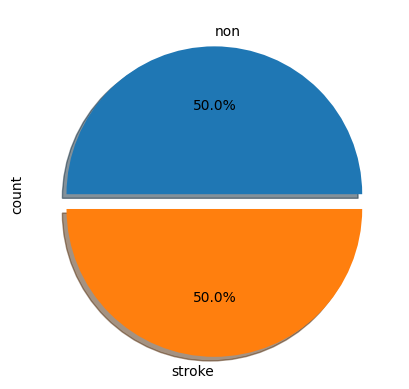

In [2181]:
df_copy['stroke'].value_counts().plot.pie(explode = [0,0.1], autopct="%1.1f%%",labels=["non","stroke"], shadow=True)


# Visulization 

### Scatter Plot

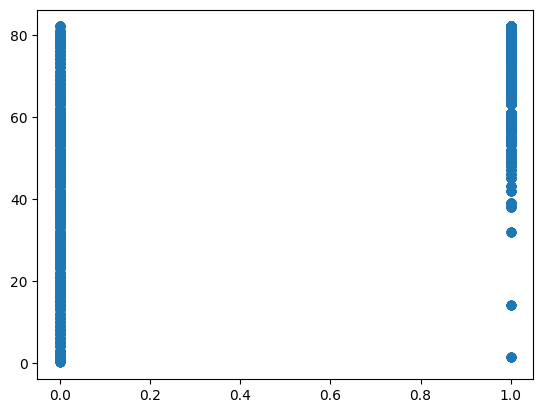

In [2182]:

area = (30 * np.random.rand(100))**2
plt.scatter(df_copy['stroke'], df_copy['age'])

plt.show()

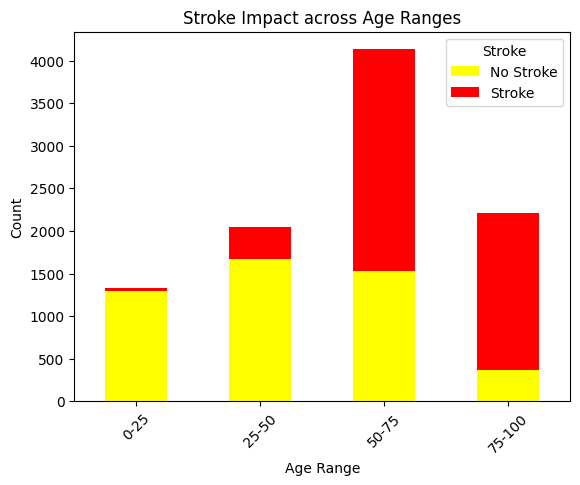

In [2183]:

# Assuming df_copy contains your dataset
ranges_value= [0, 25, 50, 75, 100]  # Define your age bins
labels = ['0-25', '25-50', '50-75', '75-100']  # Labels for the bins

# Crosstabulation between age ranges and stroke with dynamic binning
show_age_impact = pd.crosstab(pd.cut(df_copy['age'], bins= ranges_value, labels=labels), df_copy['stroke'])

# Plotting the crosstab data
show_age_impact.plot(kind='bar', stacked=True, color=['yellow', 'red'], grid=False)
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Stroke Impact across Age Ranges')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

### Bar Plot for Ever Married & Age

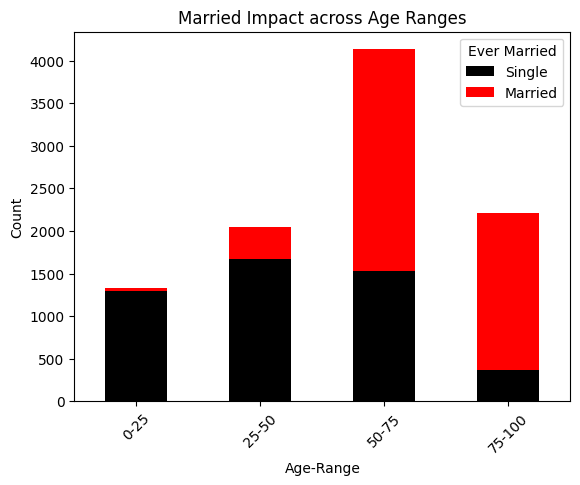

In [2184]:
ranges_value= [0, 25, 50, 75, 100]  # Define your age bins
labels = ['0-25', '25-50', '50-75', '75-100']  # Labels for the bins
show_age_impact_married = pd.crosstab(pd.cut(df_copy['age'], bins= ranges_value, labels=labels), df_copy['ever_married'])

# Plotting the crosstab data
show_age_impact.plot(kind='bar', stacked=True, color=['black', 'red'], grid=False)
plt.xlabel('Age-Range')
plt.ylabel('Count')
plt.title('Married Impact across Age Ranges')
plt.legend(title='Ever Married', labels=['Single', 'Married'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

<Axes: >

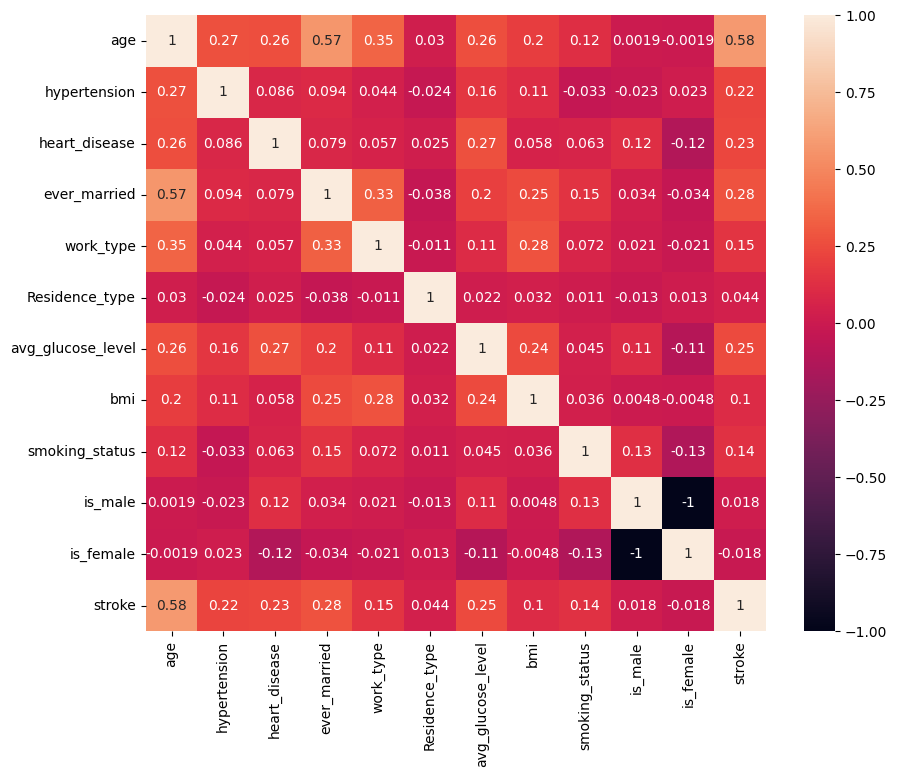

In [2185]:
corrl = df_copy.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corrl,annot=True)

K-best for bmi with mean

In [2206]:
from sklearn.feature_selection import SelectKBest, chi2, RFE, mutual_info_classif
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split


X = df_copy.drop(columns=['stroke'])
y = df_copy['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize variables to keep track of the best feature selection method and its score
best_method = ""
best_score = 0

# Feature selection using SelectKBest (chi2)
select_k_best = SelectKBest(score_func=chi2, k=11)
X_new = select_k_best.fit_transform(X_train, y_train)
x_test_new = select_k_best.transform(X_test)
clf = DecisionTreeClassifier()
clf.fit(X_new, y_train)
y_pred = clf.predict(x_test_new)
score = clf.score(select_k_best.transform(X_test), y_test)
accuray =recall_score(y_test,y_pred)
print("SelectKBest (chi2) Score:", score)
print("SelectKBest (chi2) accuracy:", accuray)
confusion = confusion_matrix(y_test,y_pred)
print(confusion)

SelectKBest (chi2) Score: 0.9600823045267489
SelectKBest (chi2) accuracy: 1.0
[[2275  194]
 [   0 2391]]
